In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create featues
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels

Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# plot the relationship



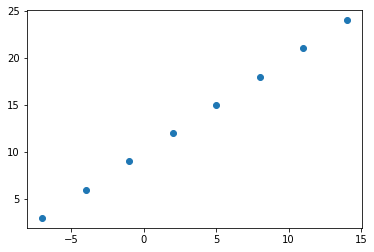

In [4]:
plt.scatter(X,Y)

In [5]:
# turn numpy arrays into tensors
X = tf.constant(tf.cast(X, dtype=np.float32))
Y = tf.constant(tf.cast(Y, dtype=np.float32))

X.ndim , Y.ndim

(1, 1)

## building neural netwoek modelm in tensor flow
* crete the model
* Compile the model
* Fit the model 
* Evaluate the model




In [6]:
# set the random seed 
tf.random.set_seed(42)

# create the model with sequentiol APU

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics =['mae'])

# Fit the model 
model.fit(X, Y, epochs=6)


Epoch 1/6
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/6
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/6
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/6
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/6
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/6
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423


In [7]:
# make predictions using the model

model.predict([17.0])  # this prediction is wrong we have to do more hyperparameter tuning

array([[13.321021]], dtype=float32)

## improve the model

In [8]:
# create the model 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(), 
metrics = ["mae"])

model.fit(X,Y, epochs=100, verbose=0)

In [9]:
# pridict the value
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [10]:
# another improved model with hidden layers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
optimizer= tf.keras.optimizers.SGD(),
metrics=["mae"])

model.fit(X,Y, epochs=30, verbose=0)

In [11]:
# mae is less value wrt previous models
#predict the value

model.predict([17.0])

array([[31.66649]], dtype=float32)

In [12]:
# create large data set
X1 = tf.range(-100,100, 4)
X1

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [13]:
Y1 = X1 + 10
Y1 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

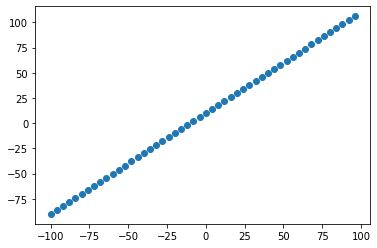

In [14]:
plt.scatter(X1,Y1)

## Three sets of data
* Training set
* Validating set
* Test set

In [15]:
len(X1)

50

In [16]:
# training set
X_train =  X1[:40]
Y_train =  Y1[:40]

# test set
X_test = X1[40:]
Y_test = Y1[40:]


## Visualize data
lets visualize training and testing data

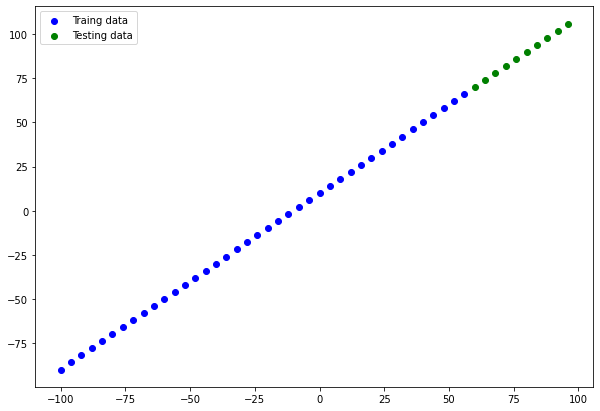

In [17]:
plt.figure(figsize =(10,7))
plt.scatter(X_train,Y_train, c='b', label='Traing data')
plt.scatter(X_test,Y_test, c='g', label='Testing data')
plt.legend();

In [18]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),   # input_shape prarameter, trinable and non-trinable parameters
    tf.keras.layers.Dense(1, name = "output_layer")
], name ="model")

# compile the model
model.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics=["mae"])

# fit the model
model.fit(X_train, Y_train, epochs=100,verbose=0)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


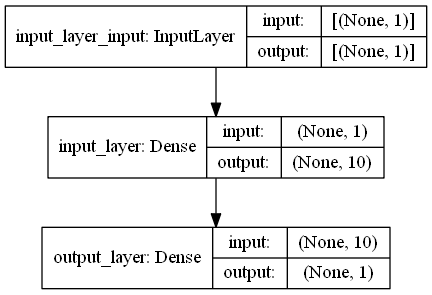

In [20]:
# plot model 

from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True )

### Visualize models predictions

In [21]:
Y_pred = model.predict(X_test)
Y_pred

array([[ 76.312386],
       [ 81.28484 ],
       [ 86.2573  ],
       [ 91.22976 ],
       [ 96.20221 ],
       [101.17466 ],
       [106.14712 ],
       [111.11957 ],
       [116.09204 ],
       [121.0645  ]], dtype=float32)

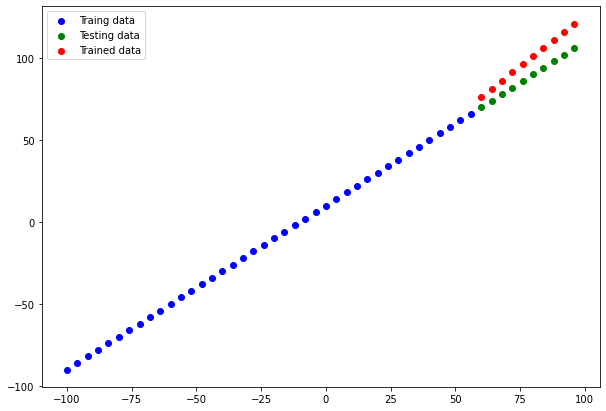

In [22]:
plt.figure(figsize =(10,7))
plt.scatter(X_train,Y_train, c='b', label='Traing data')
plt.scatter(X_test,Y_test, c='g', label='Testing data')
plt.scatter(X_test,Y_pred, c='r', label = 'Trained data')
plt.legend();

In [23]:
# plot prediction function

def plot_prediction (train_data = X_train, train_labels = Y_train, test_data = X_test, test_labels = Y_test, predictions = Y_pred ) :

                    plt.figure(figsize=(10,7))

                    # plot traing data
                    plt.scatter(train_data, train_labels, c='b', label='Training data')

                    # plot testing data
                    plt.scatter(test_data, test_labels, c='g', label='Testing data')

                    # plot predictions
                    plt.scatter(test_data, predictions,  c='r', label='Prections')

                    plt.legend();

In [24]:
# evaluating models prections with regression evaluating metrics

# MAE - absolute valur
# MSE - larger erros will be more significant


In [25]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 156ms/step - loss: 10.6884 - mae: 10.6884


[10.688438415527344, 10.688438415527344]

In [26]:
# calculate mae and mse regression evaluation metrics

def cal_error(y_true = Y_test, y_pred = Y_pred):
    mae = tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))
    mse = tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

    return [mae.numpy(), mse.numpy()]

In [27]:
# calculate error

cal_error()

[10.688438, 122.04451]

In [28]:
# build a new model

tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_1.fit(X_train, Y_train, epochs =500,verbose=0)



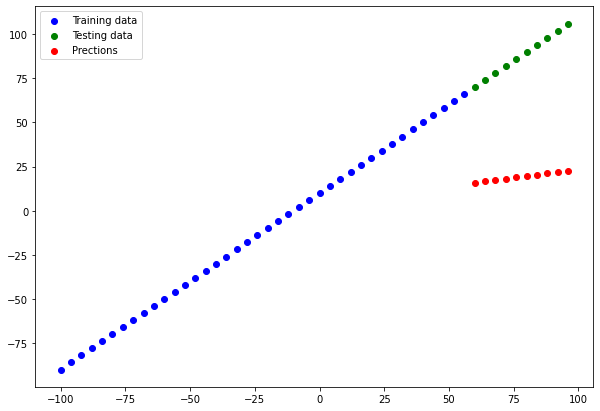

In [29]:
Y_pred = model_1.predict(X_test)
plot_prediction(predictions = Y_pred)  # model is over fillted, not well genaralized for data that has seen before

In [30]:
# caculate evaluation metrics

cal_error(Y_test,Y_pred)

[68.71362, 4808.03]

## I have lost so many exe that I have done before
## Data pre-processing

In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
insuarance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insuarance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create coloumn transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker", "region"])
)

# create x and y
X = insuarance.drop("charges", axis=1)
y = insuarance["charges"]

# build train and test sets

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# fit the coloumn transfer using our training data
ct.fit(X_train)

# transform traing and testing data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [34]:
# check the shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

<AxesSubplot:ylabel='Frequency'>

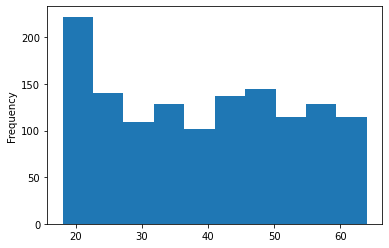

In [35]:
X["age"].plot(kind="hist")

In [36]:
# build a neural network model to fit on normalized data
tf.random.set_seed(42)

insuarance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insuarance_model_4.compile(
    loss= tf.keras.losses.mae, 
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

insuarance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [37]:
insuarance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]